In [1]:
from src.output_parser import *
import pandas as pd
import glob

In [2]:
gas ='N2'

In [17]:
list_files  = glob.glob("data/simulations/SAB*N2*/Output/System_0/*")

In [21]:
results = []
for filename in list_files:
    with open(filename,'r') as f:
        string_output = f.read() 
    results.append(parse(string_output))
    
uptakes = [[r['Thermo/Baro-stat NHC parameters']['External Pressure'][0],
            r["Number of molecules"][gas]
            ["Average loading absolute [cm^3 (STP)/cm^3 framework]"][0]]
           for r in results]

isotherm = pd.DataFrame(uptakes,columns=['pressure(Pa)','uptake(cm^3 (STP)/cm^3 framework)']).sort_values(by='pressure(Pa)')
isotherm['pressure(bar)']=isotherm['pressure(Pa)']/100000

/opt/.conda/envs/simple-adsorption-workflow/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='pressure(bar)', ylabel='uptake(cm^3 (STP)/cm^3 framework)'>

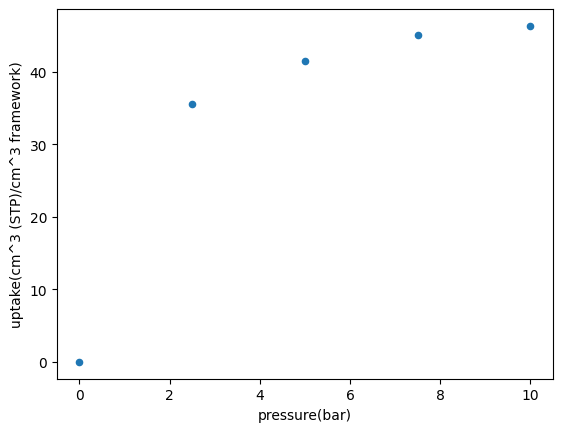

In [14]:
isotherm.plot(x='pressure(bar)',y='uptake(cm^3 (STP)/cm^3 framework)',kind='scatter')